# W205 - Project 1 Part 3

## Erin Werner

In [31]:
import seaborn as sns
from matplotlib import pyplot

The goal of this project is to determine the five most popular bike-share commute trips in San Francisco. We will determine the most popular trips and then offer various promotion and discount recommendations based on the findings.

### What are the 5 most popular trips that you would call "commuter trips"?

Our main goal is to determine the most popular commuter trips for the bike-share service. In this context, we will define a commuter trip as a back-and-fourth route taken between the office building and a secondary location. More specifically, a commuter trip consists of two bike rides, one which goes from Station A to Station B in the morning as well as the reversed trip, Station B to Station A, in the evening. Each trip is one way, meaning that the ride starts and ends at two different locations. The trips also take place during the week and take under 30 minutes to complete.

However, it is possible that an individual can slightly change their route, meaning that they will start or end at a different location or time. So, we will also consider slight variations in routes when determining the five most popular "commuter trips".

This criteria will be how we determine the top five most popular commuter trips.

In order to determine the most popular commuter trips, we will need to do some basic exploration to gain a better idea of the information we are working with. These basic queries will help to provide insight into the context of the bike-share service. 

First, we want to know the overall size of our data set, which reflects the total number of rides that have been taken.  

In [32]:
%%bigquery query_1

SELECT count(*) as total_rides
FROM `bigquery-public-data.san_francisco.bikeshare_trips`

In [33]:
query_1

,total_rides
0,983648


There are a total of 983,648 total rides in the data set.

We also want to know how many bikes are available throughout the bike-share program.

In [34]:
%%bigquery query_3

SELECT count(distinct bike_number) AS total_bikes
FROM `bigquery-public-data.san_francisco.bikeshare_trips`

In [35]:
query_3

,total_bikes
0,700


There are a total of 700 bikes that are avaiable for riders.

It would also be useful to know the time span of which our data covers.  

In [36]:
%%bigquery query_2

SELECT min(start_date) AS st_time, max(end_date) AS end_time
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 

In [37]:
query_2

,st_time,end_time
0,2013-08-29 09:08:00+00:00,2016-08-31 23:48:00+00:00


The earliest ride start time took place around 9 am on 8/29/2013. The latest end of a ride took place around 11 pm on 8/31/2016. This means that our data goes from August 2013 to August 2016, covering a span of 3 years worth of rides. 

It will also be useful to know when the rides generally take place. So, we can consider the amount of morning vs afternoon rides. 

In [38]:
%%bigquery query_4

WITH tempTable AS ( 
    SELECT EXTRACT(HOUR FROM start_date) AS hr,
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` ) 
SELECT 
    COUNT(CASE WHEN hr <= 12 then 1 ELSE NULL END) AS Morning,
    COUNT(CASE WHEN hr > 12 then 1 ELSE NULL END) AS Afternoon
FROM tempTable

In [39]:
query_4

,Morning,Afternoon
0,459289,524359


By dividing the morning and afternoon as 0-12 and 12-24 (hours), there are 459,289 total trips taken in the morning and 524,359 total trips taken in the afternoon. So, there are more afternoon trips, making up 53% of the total trips. Although the afternoon is sightly more popular, there is still a general balance between morning and afternoon rides, which is indicative of commute trips as they consist of pairs of morning and evening rides.

Yet, we want to know when rides occur more specifically by the hour. This will provide a more detailed perspective as to when riders are actually using the service and if they are using it in their commutes to work.

In [40]:
%%bigquery query_5v1

WITH tempTable AS ( 
    SELECT start_date, 
    EXTRACT(HOUR FROM start_date) AS hr 
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
    GROUP BY start_date) 
SELECT hr, count(hr) AS popularTime 
FROM tempTable 
GROUP BY hr 
ORDER BY popularTime DESC 

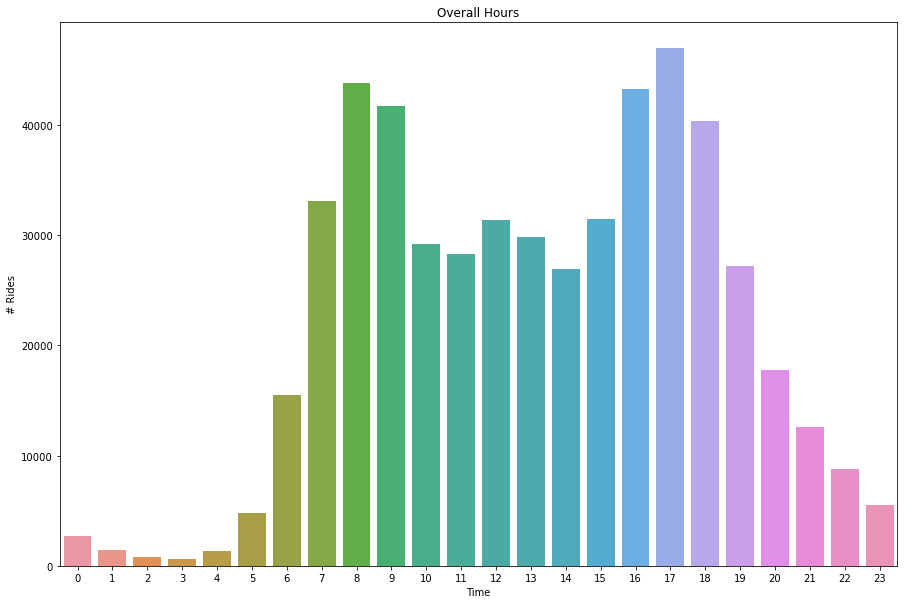

In [41]:
fig, ax = pyplot.subplots(figsize=(15,10))

sns.barplot(x = query_5v1['hr'], y = query_5v1['popularTime'], ax = ax).set_title("Overall Hours")
pyplot.xlabel("Time")
pyplot.ylabel("# Rides")
pyplot.show()

We can see that the most popular hours are 4-6 PM and 8-9 AM, with 5 PM being the most popular hour to use the bike share service.  These times are common starting and ending work hours, which supports the notion that people are using the bike share service as a vehicle in their commute. This then helps to establish a time frame in which our defined commute trips occur.

It would also be useful to know the popularity of certain hours during the week versus during the weekend. This is because we expect the commute trips to take place during the weekday, not on the weekends.

We will look at the weekday hours of use first.

In [42]:
%%bigquery query_5v2

WITH tempTable AS ( 
    SELECT start_date, 
    EXTRACT(HOUR FROM start_date) AS hr 
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
    WHERE EXTRACT(DAYOFWEEK FROM start_date) > 1 AND EXTRACT(DAYOFWEEK FROM start_date) < 7
    GROUP BY start_date) 
SELECT hr, count(hr) AS popularTime 
FROM tempTable 
GROUP BY hr 
ORDER BY popularTime DESC 

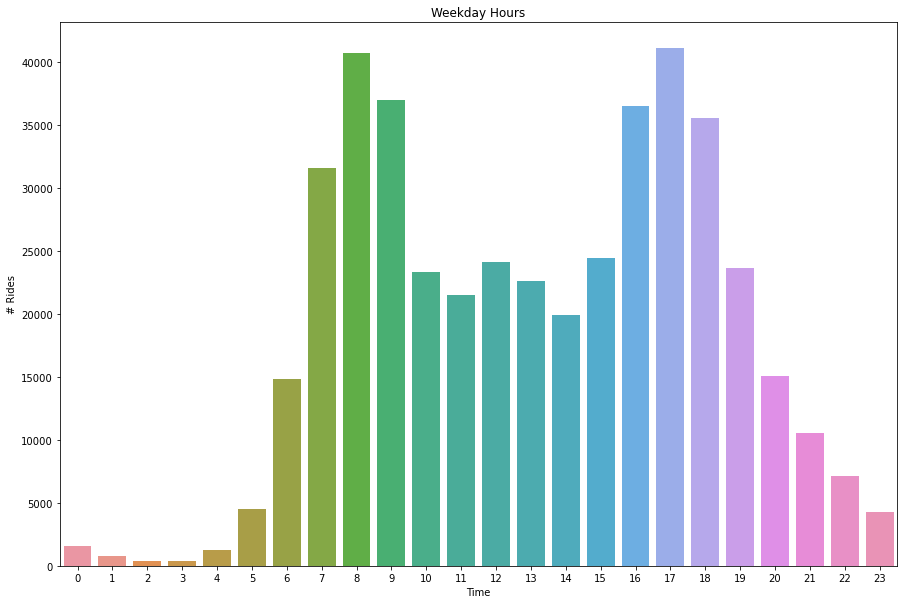

In [43]:
fig, ax = pyplot.subplots(figsize=(15,10))

sns.barplot(x = query_5v2['hr'], y = query_5v2['popularTime'], ax = ax).set_title("Weekday Hours")
pyplot.xlabel("Time")
pyplot.ylabel("# Rides")
pyplot.show()

We can see that there is a very similar distribution of rides taken in each hour during the week as the rides overall.

Now, we can take a closer look at the popular riding hours on the weekends.

In [47]:
%%bigquery query_5v3

WITH tempTable AS ( 
    SELECT start_date, 
    EXTRACT(HOUR FROM start_date) AS hr 
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
    WHERE EXTRACT(DAYOFWEEK FROM start_date) = 1 OR EXTRACT(DAYOFWEEK FROM start_date) = 7
    GROUP BY start_date) 
SELECT hr, count(hr) AS popularTime 
FROM tempTable 
GROUP BY hr 
ORDER BY popularTime DESC 

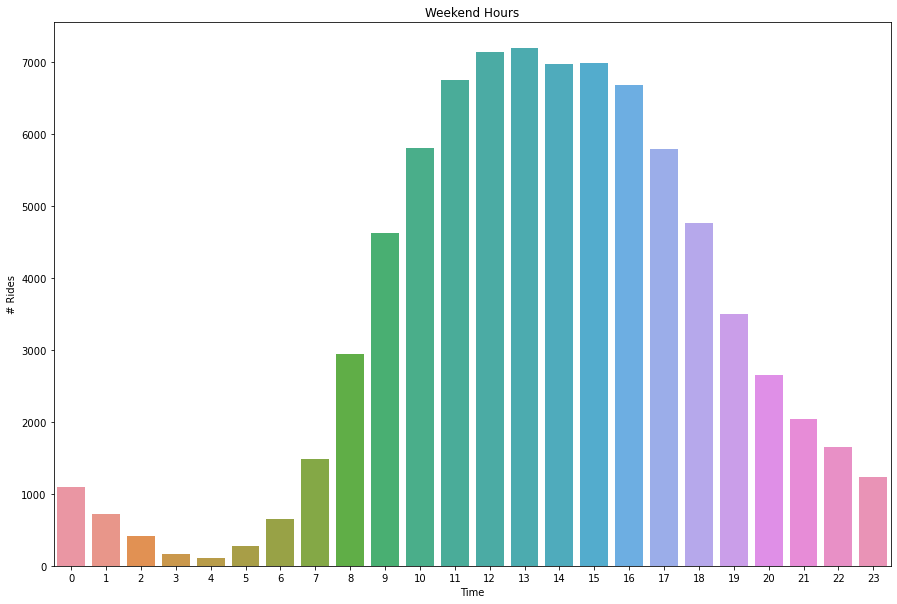

In [49]:
fig, ax = pyplot.subplots(figsize=(15,10))

sns.barplot(x = query_5v3['hr'], y = query_5v3['popularTime'], ax = ax).set_title("Weekend Hours")
pyplot.xlabel("Time")
pyplot.ylabel("# Rides")
pyplot.show()

During the weekend, we see a very different distribution of when rides take place. Hours that are not very popular during the week are some of the most popular hours during the weekend. This is most likely due to the purpose behind why an individual would use the bike-share service on that given day. So, on the weekends, rides might be more recreational or help an individual get to and from an activity, such as going to lunch or to a park.

Yet, the overall histogram essentially 'outweighs' the weekend histogram, meaning that the weekday routes are more occur more frequently. As the weekday routes take place during typical rush hours, it is fair to assume that the bike share service is being commonly used for commute trips.

Additionally, it would also be helpful to know how long these one-way trips take, on average. 

In [50]:
%%bigquery query_6v1

SELECT (duration_sec/60) AS time, 
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE start_station_id != end_station_id

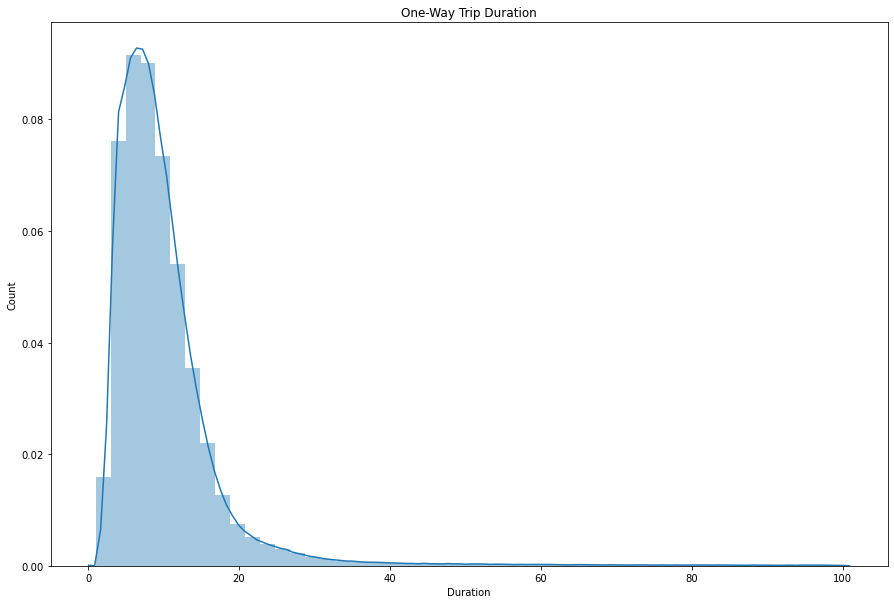

In [51]:
query_6v1 = query_6v1[query_6v1["time"] < 100]

fig, ax = pyplot.subplots(figsize=(15,10))

sns.distplot(query_6v1["time"], ax = ax).set_title("One-Way Trip Duration")
pyplot.xlabel("Duration")
pyplot.ylabel("Count")
pyplot.show()

We can see from the histogram that the majority of one-way trips are under 20 minutes long. The large tail and positive right skew are most likely influenced by potential outliers. Overall, the average duration of one-way trips falls within our definition of commuter trips of being under 30 minutes. This then also futher reinforces our assumption that many bike-share rides are taken as part of an individuals commute.

In [52]:
%%bigquery query_6

WITH tempTable AS (
  SELECT (duration_sec/60) AS time, 
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE start_station_id != end_station_id)
SELECT AVG(time) AS avg_OneWay
FROM tempTable;

In [53]:
query_6

,avg_OneWay
0,14.219262


More specifically, we can see that the overall average for one way trips is about 14 minutes which still supports our definition of commute trips.

Next, we will want to start looking depper into the actual stations in which rides start and end. This will start to give us an idea about where people are actually using the bike-share service and whether or not those locations are associated with potential commute trips.

In [54]:
%%bigquery query_7v1

WITH tempTable AS (
  SELECT start_station_id AS st, count(*) AS num_rides
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  GROUP BY start_station_id 
  ORDER BY num_rides DESC)
SELECT name, st, num_rides
FROM tempTable AS trips JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS stations 
  ON trips.st = stations.station_id
WHERE stations.station_id = trips.st 
GROUP BY name, st, num_rides

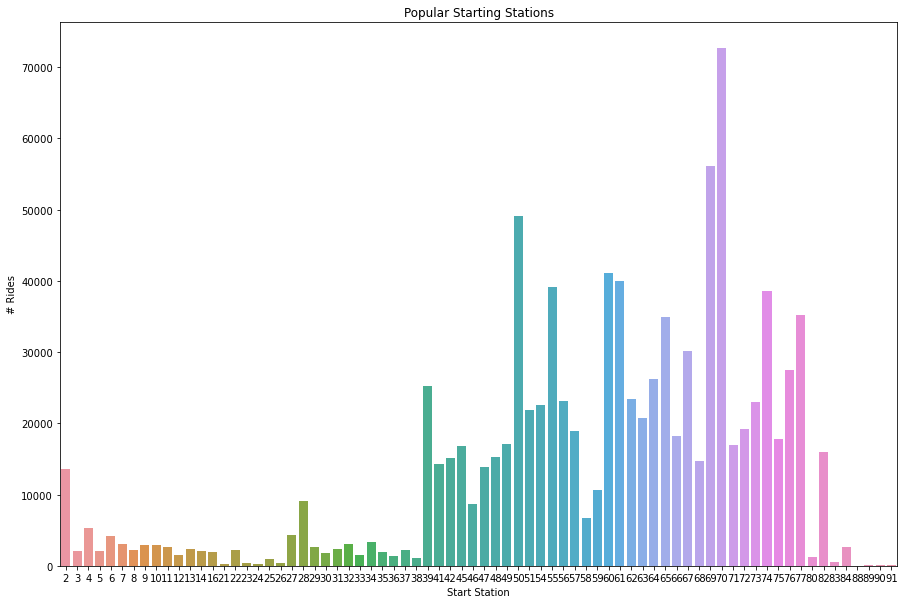

In [59]:
fig, ax = pyplot.subplots(figsize=(15,10))

sns.barplot(x = query_7v1['st'], y = query_7v1['num_rides'], ax = ax).set_title("Popular Starting Stations")
pyplot.xlabel("Start Station")
pyplot.ylabel("# Rides")
pyplot.show()

We can see that there is a wide distribution of popularity amongst the starting stations, with stations #38-77 being more frequently used than the remaining stations. This could be a result of the station location within the Bay Area. It is likely that the more popular stations are more ideally located for the people that use the service. So, it is fair to assume that stations located closer in proximity to other forms of public transportation or business dense areas would be more popular amongst riders that are utlizing the service in their commutes.

In [60]:
%%bigquery query_7

WITH tempTable AS (
  SELECT start_station_id AS st, count(*) AS num_rides
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  GROUP BY start_station_id 
  ORDER BY num_rides DESC
  LIMIT 3)
SELECT name, st, num_rides
FROM tempTable AS trips JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS stations 
  ON trips.st = stations.station_id
WHERE stations.station_id = trips.st 
GROUP BY name, st, num_rides

In [61]:
query_7

,name,st,num_rides
0,San Francisco Caltrain (Townsend at 4th),70,72683
1,San Francisco Caltrain 2 (330 Townsend),69,56100
2,Harry Bridges Plaza (Ferry Building),50,49062


The top three starting stations are Station #70, 50, and 69. All three are located somewhat close to each other in the north east part of the city. That area makes up the Finanical District, which is San Franciscos's buisness-dense area. This would support the assumption that many riders are starting their rides from these stations in order to commute to work.

Furthermore, the first and third most popular stations are San Francisco Caltrain (Townsend at 4th) and San Francisco Caltrain 2 (330 Townsend), which are both located near Caltrain station stops. The Caltrain is a different form of public transportation that is commonly used for commuters. So, it makes sense that an individual who commutes by train would also use the bike-share service as an additional mode of transportation in getting to and from work.

We will also want to look at the popularity of ending stations.

In [62]:
%%bigquery query_8v1

WITH tempTable AS (
  SELECT end_station_id AS st, count(*) AS num_rides
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  GROUP BY end_station_id 
  ORDER BY num_rides DESC)
SELECT name, st, num_rides
  FROM tempTable AS trips JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS stations 
  ON trips.st = stations.station_id
WHERE stations.station_id = trips.st 
GROUP BY name, st, num_rides

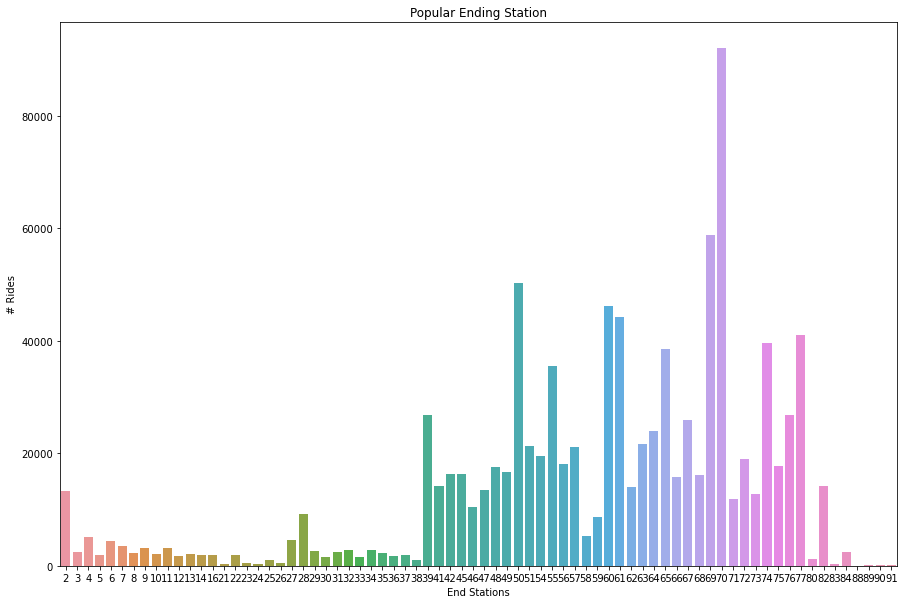

In [63]:
fig, ax = pyplot.subplots(figsize=(15,10))

sns.barplot(x = query_8v1['st'], y = query_8v1['num_rides'], ax = ax).set_title("Popular Ending Station")
pyplot.xlabel("End Stations")
pyplot.ylabel("# Rides")
pyplot.show()

We can see that the same stations are equally popular for ending locations as starting locations. This coincides with our definition of commute trips as the routes taken in the morning are then reversed in the evening. As a result, the same stations are being repeatedly used to start and end rides, producing similiar popularities amongst the starting and ending locations.  

In [64]:
%%bigquery query_8

WITH tempTable AS (
  SELECT end_station_id AS st, count(*) AS num_rides
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
  GROUP BY end_station_id 
  ORDER BY num_rides DESC
  LIMIT 3)
SELECT name, st, num_rides
  FROM tempTable AS trips JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS stations 
  ON trips.st = stations.station_id
WHERE stations.station_id = trips.st 
GROUP BY name, st, num_rides

In [65]:
query_8

,name,st,num_rides
0,San Francisco Caltrain (Townsend at 4th),70,92014
1,San Francisco Caltrain 2 (330 Townsend),69,58713
2,Harry Bridges Plaza (Ferry Building),50,50185


We can see that the top three ending stations are also the top three starting stations, although in a slightly different order. This, makes a good argument that these stations are part of popular commute routes.

However, there is the possibility for individuals to vary the start or end location of their commute route. It is likely that those individuals are electing to go to a different, yet nearby station. One of the possible reasons for that may be the dock or bike availability at the given station.  

Next, we will take a look at the average number of docks and bikes available throughout the day at different stations. 

In [66]:
%%bigquery query_14v2

WITH tempTable AS ( 
SELECT ROUND(AVG(docks_available)) AS docks, station_id,
  EXTRACT(HOUR FROM time) AS hour 
FROM `bigquery-public-data.san_francisco.bikeshare_status` AS status
GROUP BY hour, station_id
ORDER BY hour)
SELECT tempTable.docks,
  EXTRACT(HOUR FROM start_date) AS hr, 
  COUNT(EXTRACT(HOUR FROM start_date)) AS popHr,
  start_station_id
FROM `bigquery-public-data.san_francisco.bikeshare_trips` AS trips
JOIN tempTable ON EXTRACT(HOUR FROM start_date) = tempTable.hour
   AND tempTable.station_id = start_station_id
GROUP BY hr, docks, start_station_id
ORDER BY popHr DESC

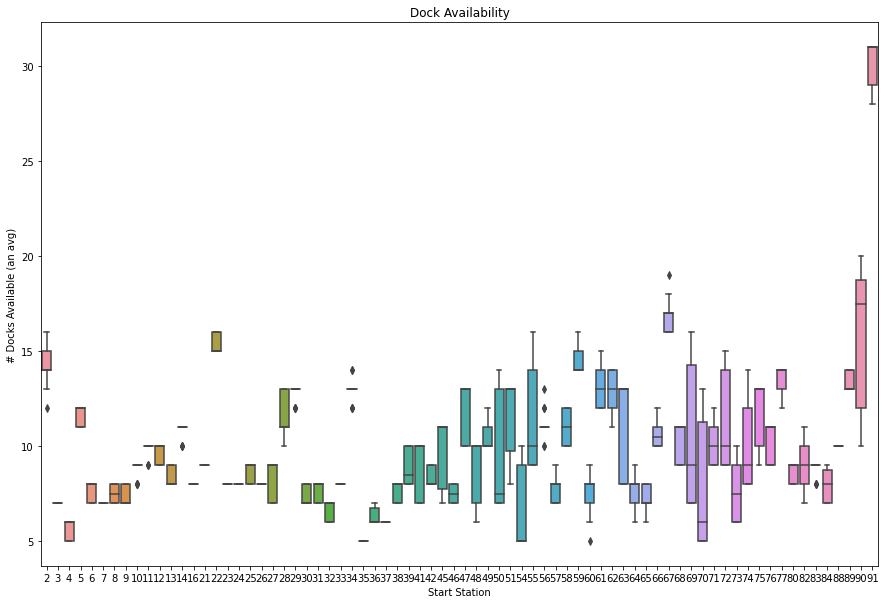

In [70]:
fig, ax = pyplot.subplots(figsize=(15,10))

sns.boxplot(x = query_14v2['start_station_id'], y = query_14v2['docks'], ax = ax).set_title("Dock Availability")
pyplot.xlabel("Start Station")
pyplot.ylabel("# Docks Available (an avg)")
pyplot.show()

We can see from the box plot that there is a wide distribution of dock availability amongst the popular stations, with the exception of Station #90 and #91, which always seem to have an abundance of docks available during the day. Although it appears that there are generally docks available at each station, this plot was derived from averages within each hour. So, it is still possible that on occasions there are no docks available. Overall, we can see that there is generally good dock availibilty, but this factor can still impact an individual's route.

We will also want to consider the bike availibility.

In [68]:
%%bigquery query_14v1

WITH tempTable AS ( 
SELECT ROUND(AVG(bikes_available)) AS bikes, station_id,
  EXTRACT(HOUR FROM time) AS hour 
FROM `bigquery-public-data.san_francisco.bikeshare_status` AS status
GROUP BY hour, station_id
ORDER BY hour)
SELECT tempTable.bikes,
  EXTRACT(HOUR FROM start_date) AS hr, 
  COUNT(EXTRACT(HOUR FROM start_date)) AS popHr,
  start_station_id
FROM `bigquery-public-data.san_francisco.bikeshare_trips` AS trips
JOIN tempTable ON EXTRACT(HOUR FROM start_date) = tempTable.hour
   AND tempTable.station_id = start_station_id
GROUP BY hr, bikes, start_station_id
ORDER BY popHr DESC

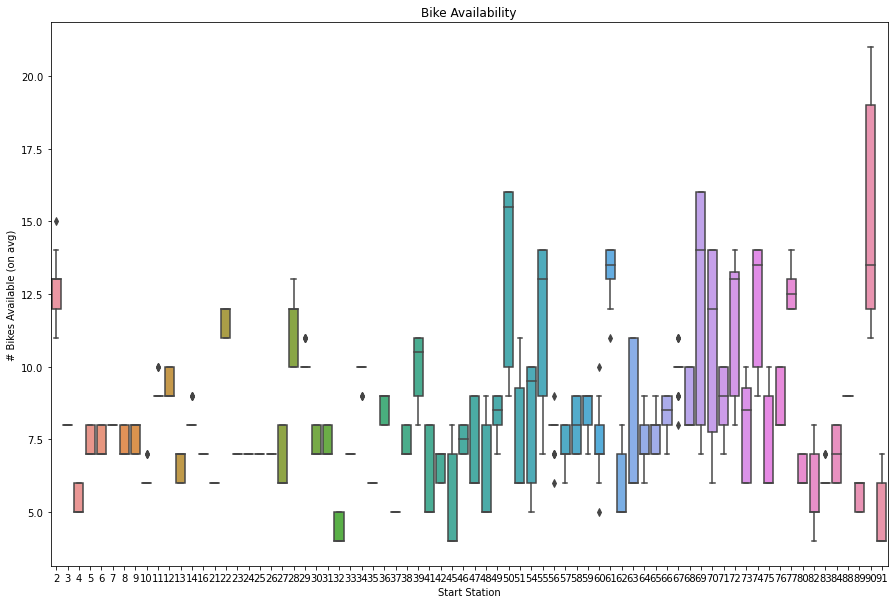

In [69]:
fig, ax = pyplot.subplots(figsize=(15,10))

sns.boxplot(x = query_14v1['start_station_id'], y = query_14v1['bikes'], ax = ax).set_title("Bike Availability")
pyplot.xlabel("Start Station")
pyplot.ylabel("# Bikes Available (on avg)")
pyplot.show()

There appears to be similar distributions of dock and bike availability across the stations throughout the day. We can see from the box plot that there is a wide distribution of bike availability amongst the popular stations, with the exception of station #90, which always seems to have an abundance of bikes. Although it appears that there are generally bikes available at each station, this plot was derived from averages within each hour. So, like with docks, it is still possible that on occasions there are no bikes available. Yet, this opens up the possibility for other reasonings behind alternative routes, such as after work activities that would lead the rider to a different start station and time.

Now that we know where rides are starting and ending in general, we need to start looking more closely at the most popular routes that are taken. A route consists of both a start and end station. So, routes themselves can have different popularities than just their individual starting and ending locations. However, there are multiple definitions of popularity.  

There is overall popularity, which considers how frequently the same start and end station have been repeated. There is also popularity of routes in regards to when they take place. For instance, a certain route can be frequently repeated at any time throughout the three years that the data covers, which would make it popular overall. But, a different route can be consistenantly repeated during the same hour throughout the three years, making it more popular at that given time. As our definition of a commute trip states that trips are taken in both the morning and evening, we will want to consider both types of popularity.  

As a result, we will look at the overall most popular routes as well as the popular routes with regard to the hour in which those rides start. These results collectively will help us determine the five most popular commute trips.

In [71]:
%%bigquery query_10v1

WITH tempTable AS (
SELECT start_station_id AS s_st, end_station_id AS e_st, count(*) AS num_rides
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_id, end_station_id 
ORDER BY num_rides DESC)
SELECT stations.name AS start_station_name, stations1.name AS end_station_name, s_st, e_st, num_rides,
FROM tempTable AS trips 
LEFT JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS stations 
ON trips.s_st = stations.station_id 
LEFT JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS stations1 
ON trips.e_st = stations1.station_id 
GROUP BY start_station_name, end_station_name, s_st, e_st, num_rides
ORDER BY num_rides DESC

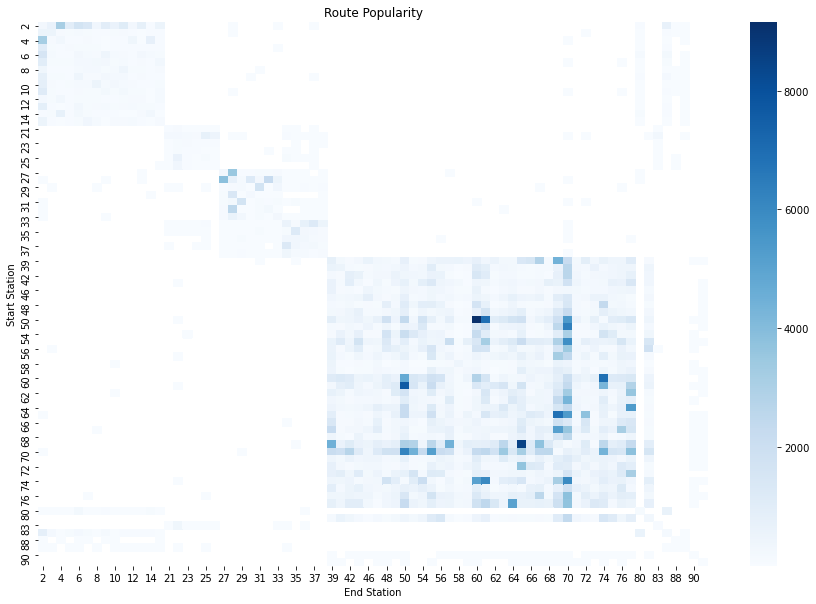

In [72]:
routes = query_10v1.pivot("s_st", "e_st", "num_rides")

fig, ax = pyplot.subplots(figsize=(15,10))

sns.heatmap(data = routes, cmap="Blues", ax = ax).set_title("Route Popularity")
pyplot.xlabel("End Station")
pyplot.ylabel("Start Station")
pyplot.show()

We can see from the heat map that some routes are clearly more common than others, with more popular routes being represented by darker squares. The distinct blocks of cells along the diagonal seem to indicate the popularity of certain routes in relation to location, as Stations #2-14 are around San Jose whereas Stations #38-90 are in San Francisco. It is evident that the same popular stations (#38-90) are more commonly used as starting and ending stations amongst each other. We can also see a thicker bar both horizontally and vertically at Station #70, proving that this is the most popular starting and ending station. However the darkest square is represented by starting Station #50 and ending station #60. Although our heat map gives us a good overall view of the popularity of all possible routes, we will want to take a closer look at just the top 20 most popular routes.  

In [73]:
%%bigquery query_10

WITH tempTable AS (
SELECT start_station_id AS s_st, end_station_id AS e_st, count(*) AS num_rides
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY start_station_id, end_station_id 
ORDER BY num_rides DESC
LIMIT 20)
SELECT stations.name AS start_station_name, stations1.name AS end_station_name, s_st, e_st, num_rides,
FROM tempTable AS trips 
LEFT JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS stations 
ON trips.s_st = stations.station_id 
LEFT JOIN `bigquery-public-data.san_francisco.bikeshare_stations` AS stations1 
ON trips.e_st = stations1.station_id 
GROUP BY start_station_name, end_station_name, s_st, e_st, num_rides
ORDER BY num_rides DESC

In [74]:
query_10

,start_station_name,end_station_name,s_st,e_st,num_rides
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,50,60,9150
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,69,65,8508
2,2nd at Townsend,Harry Bridges Plaza (Ferry Building),61,50,7620
3,Harry Bridges Plaza (Ferry Building),2nd at Townsend,50,61,6888
4,Embarcadero at Sansome,Steuart at Market,60,74,6874
5,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),65,69,6836
6,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),51,70,6351
7,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),70,50,6215
8,Steuart at Market,2nd at Townsend,74,61,6039
9,Steuart at Market,San Francisco Caltrain (Townsend at 4th),74,70,5959


Here we can see the top 20 most popular routes. This ranking is determined by the total number of trips taken from the same start and end station pair. It is apparent that there are commute trips in this ranking as we can see similar popularity between the same routes, just with reversed starting and ending stations. For example, route 61 -> 50 is ranked #3 and 50 -> 61 is ranked #4. Additionally, the top three starting and ending locations appear in multiple different combinations in this list. As a result, this list will serve as one of the main sources to determine the five most popular commute trips.

As part of our definition of a commute trip is the trip duration (under 30 minutes), it will also be useful to know how long, on average, the overall popular rides take.

In [75]:
%%bigquery query_11

SELECT start_station_id AS s_st, end_station_id AS e_st, count(*) AS num_rides, ROUND(AVG(duration_sec/60)) AS minutes,
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
WHERE (duration_sec/60) > 2
GROUP BY start_station_id, end_station_id 
ORDER BY num_rides DESC
LIMIT 10

In [76]:
query_11

,s_st,e_st,num_rides,minutes
0,50,60,9150,20.0
1,69,65,8508,5.0
2,61,50,7620,10.0
3,50,61,6888,11.0
4,60,74,6874,9.0
5,65,69,6830,5.0
6,51,70,6351,12.0
7,70,50,6215,13.0
8,74,61,6039,10.0
9,74,70,5959,12.0


We can see that the most popular route (Station #50-60) on average takes about 20 minutes, but the remaining most popular routes take less than 15 minutes. This validates our definition of a commuter trip, especially as it reflects the average one-way trip duration time.

Lastly, we want to look at the popularity of routes in regards to the hour in which they take place. Our definition of a commute trip requires that there is a morning trip that is then reversed in the evening. By considering popularity by hour, we will be able to really see these morning/evening ride pairs and, thus, be able to determine the five most popular commute trips.

In [77]:
%%bigquery query_12

WITH tempTable AS ( 
    SELECT start_date, start_station_id, end_station_id,
    EXTRACT(HOUR FROM start_date) AS hr 
    FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
    WHERE EXTRACT(DAYOFWEEK FROM start_date) > 1 AND EXTRACT(DAYOFWEEK FROM start_date) < 7
    GROUP BY start_date, start_station_id, end_station_id
    ORDER BY hr) 
SELECT hr, count(hr) AS num_rides, start_station_id, end_station_id 
FROM tempTable 
GROUP BY hr, start_station_id, end_station_id 
ORDER BY num_rides DESC 
LIMIT 30

In [78]:
query_12

,hr,num_rides,start_station_id,end_station_id
0,8,2680,50,61
1,16,1910,51,70
2,17,1808,60,74
3,17,1704,61,50
4,16,1655,61,50
5,17,1554,64,77
6,8,1549,50,60
7,8,1545,74,60
8,9,1532,74,61
9,9,1511,77,64


Here we can see the top 30 most popular routes, with regard to when the trips take place. This ranking is determined by the total number of trips taken from the same start and end station pair in the given hour. We can see that there is a different order of popularity between the two lists of routes, meaning that there is in fact a difference between the two types of popularity. 

Although overall popularity is important, this table gives a more specific look at commute trip pairs as we can see the morning routes compared to the evening routes. We can see that the #3 most popular overall route (61 -> 50) as noted earlier is the 3rd and 4th most popular route, which takes place in the evening. Its reversed route (50 -> 61) is actually, now, the first most popular route by hour, which takes place in the morning. This means that this back-and-fourth trip pair is a popular commute route as per our definition. The same logic will be applied in order to find the other popular commuter trips.

Collectively, these tables will help us to determine the other most popular commuter routes.

In [79]:
commute_trips = [{'Morning':'50 -> 61'}, {'Evening':'61 -> 50'}], [{'Morning':'69 -> 65'}, {'Evening':'65 -> 69'}], [{'Morning':'50 -> 60'}, {'Evening':'60 -> 50'}], [{'Morning':'70 -> 51'}, {'Evening':'51 -> 70'}], [{'Morning':'70 -> 74'}, {'Evening':'74 -> 70'}]
commute_trips

([{'Morning': '50 -> 61'}, {'Evening': '61 -> 50'}],
 [{'Morning': '69 -> 65'}, {'Evening': '65 -> 69'}],
 [{'Morning': '50 -> 60'}, {'Evening': '60 -> 50'}],
 [{'Morning': '70 -> 51'}, {'Evening': '51 -> 70'}],
 [{'Morning': '70 -> 74'}, {'Evening': '74 -> 70'}])

* First {'Morning': '50 -> 61'}, {'Evening': '61 -> 50'}

The 1st most popular commuter route consists of a morning ride from Station #50 to Station #61, with the reversed trip taken in the evening. We know that Station #50 is the 3rd most popular starting and ending station. As mentioned previously, we can also see that morning route (#50-61) is the 4th most popular overall route, as well as the 1st most popular route by hour at 8 am. The reversed evening trip is the 3rd most popular trip overall, as well as the 3rd and 4th most popular trip at 5 and 4 pm respectively. No other routes rank as well on both popularity lists. So, these facts combine to prove that this is the most popular commute trip.   

* Second {'Morning': '69 -> 65'}, {'Evening': '65 -> 69'}

The 2nd most popular commuter route consists of a morning ride from Station #69 to Station #65, with the reversed trip taken in the evening. We know that Station #69 is the 2nd most popular starting and ending station. We can also see that morning route (#69-65) is the 2nd most popular overall route, as well as the 13th most popular route by hour at 9 am. The reversed evening trip is the 5th most popular trip overall, as well as the 26th most popular trip by hour at 5 pm. Collectively, these popularity rankings prove that this is the 2nd most popular commute trip. 

* Third {'Morning': '50 -> 60'}, {'Evening': '60 -> 50'}

The 3rd most popular route is from Station #50-60 in the morning and Station #60-50 in the evening. Once again, we know that Station #50 is the 3rd most popular station. The morning route of Station #50-60 is the most popular trip overall, as well as the 7th most popular trip by hour at 8 am. However, the evening trip of Station #60-50 does not rank in the most popular trips by hour, yet it is the 19th most popular overall trip. A possible reason for this slight difference in popularity could be the average ride duration. On average, riding from Station #50-60 or #60-50 takes about 20 minutes to complete. So, it is possible that riders choose to take the longer ride in the morning in order to get to work, but then elect to walk more and, thus, take a different, shorter ride in the evening as part of their commute. It is also possible that individuals that take this commute in the morning have after work activities that take them to a different starting station and time in the evening. Nonetheless, the rankings still prove that this is the 3rd most popular commute trip.

* Fourth {'Morning': '70 -> 51'}, {'Evening': '51 -> 70'}

The 4th most popular commute route is from Station #70-51 in the morning and Station #51-70 in the evening. Once again, we already know that Station #70 is the most popular starting and ending station. However, the evening route of this commute trip is more popular than its morning counterpart as it is the 2nd most popular route by hour at 4 pm and the 7th most popular overall route. The morning route of Station #70-51 is not ranked in the top 20 most popular overall routes, but is the 24th and 29th most popular route by hour at 8 and 7 am respectively. Those rankings combined indicate greater popularity. It should be noted that Station #51 is in close proximity of other popular bike-share stations. Station #51 is at Embarcadero at Folsom and Station #50 is at Harry Bridges Plaza (Ferry Building). These stations are very close, just a couple blocks apart in fact. We also know that Station #70-50 is the 8th most popular overall route, as well as the 12th most popular route by hour at 8 am. So, it is possible that riders are taking this similar, yet slightly different route in the morning. Despite there being an alternative trip for one of the directions, the facts show that this route is the 4th most popular commuter route.

* Fifth {'Morning': '70 -> 74'}, {'Evening': '74 -> 70'}

The 5th most popular commute route is from Station #70-74 in the morning and Station #74-70 in the evening. Once again, we already know that Station #70 is the most popular starting and ending station. We know that the evening route of Station #74-70 is the 10th most popular overall route and the 11th most popular route by hour at 5 pm. Yet, the morning route is not as popular as it is not ranked in the top 20 most popular overall routes, but is the 20th most popular route by hour at 8 am. As Station #70 is the most popular station, it is possible that the less popular morning route is in response to dock/bike availability, which would cause a change in the commute route. Another possible explanation is an alternative morning route. We know that the route from Station #70-63 is the 16th most popular route by hour at 8 am, but not ranked in the top 20 most popular overall routes. Station #63 is at Howard at 2nd whereas station #74 is at Steuart at Market. These stations are just blocks away, making a fair argument that this could serve as an occasional altervative trip as part of the commute route. Overall, the collective rankings, with consideration of variant factors, prove that this is the 5th most popular commute route.

#### What are your recommendations for offers (justify based on your findings)?

Based on all of my findings, there are four different recommendations for promotions that we can offer bike-share riders.

* One-Way Trip Bundles

It is evident that a good portion of the overall trips taken through the bike-share service are a part of an individual’s commute to work. So, riders would be especially attracted to the potential of purchasing rides "in bulk". These bundles would guarantee riders a certain amount of trips, all at a discounted rate. 

As a result, we can offer one-way trip bundles. This would consist of rides that have a different starting and ending location that take place during the week and are under 30 minutes. These characteristics are typical for commute trips, so this deal could potentially attract new riders that are looking for an afforable way to get to work.

A potential bundle could be 10 one-way rides that are to be redeemed in the course of a week. This would cover an entire week’s commute at a flat rate of a standard 10 minute one-way ride, as that is under the average one-way ride duration. The bike share service could also offer larger bundles, such as 100 one-way rides to be redeemed over the course of a year, allowing for greater flexibility in ride use. The service could also offer subscribers the ability to customize the bundle they would like to purchase. Overall, this promotion would result in more rides and more profit.

* Timely Promotions

As commuting trips are very popular for the bike-share service, there are disproportionate popularities amongst the hours in which the service is used. There are drastically different popularities of ride start times between the weekdays and the weekends. By offering a discount or special offer at the opportune time, the bikeshare service can attract attention and increase ridership in what might otherwise be a quiet sales period. 

In order to encourage riders to use the service during less popular times, the bike-share service can offer discounts directly to individuals if they start their ride between 10 am and 4 pm during the week.  

For example, this discount could motivate an individual to go out for lunch or even to get exercise during a break by using the bike-share service during non-rush hours. As a result, this promotion would help to increase ridership during quieter times.

* Location-Based Promotions

Similarly to timely promotions, the bike-share service could offer discounts that encourage riders to start or end their rides at less popular stations. We have seen from our data exploration that certain stations are used more commonly than others. This promotion would motivate riders to use less popular stations in different parts of the Bay Area.  

For example the rider could start their ride at Station #9 in Japantown or Station #90 at 5th St at Folsom St. These might be less popular stations for commute purposes, but could still benefit riders that have different goals when using the service. Additionally, individuals who commute from San Jose would especially benefit from this promotion if they start or end their ride at Station #2, the San Jose Diridon Caltrain Station, as that is a different form of public transportation that is used for commuting into the city. This promotion would then help to increase ridership across all stations.

* Buisness Partnerships

Because commutes are the reason behind many of the rides taken, the bike share service can partner with businesses who want to offer their employees deals that would encourage them to ride the bikes to work. Businesses are always looking for ways to help keep their employees healthy and happy. A company can choose to subsidized memberships for the amount of their choosing or simply sign-up to provide employees discounts.

For instance, the business partner can chose to subsidize the bike-share subscription for their employees. This would then encourage individuals to utilize the bike-share service more frequently in their commute to work as they could ride at a discounted rate.

Otherwise, the buisness partner could offer different discounts and deals to their employess. An example discount could be 15% off a one-way ride that starts or ends at the station closest to the office building. That would ensure that they are using the service as part of their commute to work.

This type of promotion could eventually be extended to universities, residential buildings, or even just groups/clubs. All of these partnerships would encourage greater ridership and result in greater profits.

However there are other types of promotions that we can also offer to a different type of audience, such as tourists.

We will define tourist trips as customer bought round trips (meaning that the ride starts and ends at the same station) that take place throughout the entire week and last over an hour. In order to determine the most optimal promotions for tourists, we will take a closer look at tourist specific data.

First, we will want to consider the average ride duration of customers vs subscribers. A tourist trip is defined to be purchased from a customer, as it is unlikely that a tourist would subscribe to the service because San Francisco is not their permanent residence.

In [80]:
%%bigquery query_13

SELECT subscriber_type, ROUND(AVG(duration_sec/60)) AS minutes
FROM `bigquery-public-data.san_francisco.bikeshare_trips` 
GROUP BY subscriber_type

In [81]:
query_13

,subscriber_type,minutes
0,Customer,62.0
1,Subscriber,10.0


We can see that customers, on average, take rides that are about an hour long while subscribers take rides that are about 10 minutes long. This reinforces our definition of a tourist trip as customers tend to take longer trips with the goal of site-seeing all over the city. It also supports the notion that subscribers are more likely to be commuters, where customers will typically be tourists.

We will also want to look at the stations in which tourists start and end their rides.

In [82]:
%%bigquery query_15

SELECT start_station_id AS station, count(*) AS num_rides,
    ROUND(AVG((duration_sec/60))) AS time, start_station_name AS name
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE start_station_id = end_station_id
GROUP BY start_station_id, name
ORDER BY num_rides DESC
LIMIT 5

In [83]:
query_15

,station,num_rides,time,name
0,60,2866,72.0,Embarcadero at Sansome
1,50,2364,100.0,Harry Bridges Plaza (Ferry Building)
2,35,1184,141.0,University and Emerson
3,76,944,136.0,Market at 4th
4,74,911,91.0,Steuart at Market


Although we do not know exactly where the riders went on their trips, we can see that all trips lasted over an hour, on average, which follows our definition of a tourist trip. We can also see that some stations that are popular among commuters are also popular among tourists, which is most likely due to their convienient location in the city. However, the longest rides are taken from less popular stations, like Station #35 which is near Standford.

As we believe the tourist rides are taken with the purpose of site-seeing, it would be helpful to know the average length of tourist trips.  

In [84]:
%%bigquery query_16v1

SELECT (duration_sec/60) AS time, 
FROM `bigquery-public-data.san_francisco.bikeshare_trips`
WHERE start_station_id = end_station_id

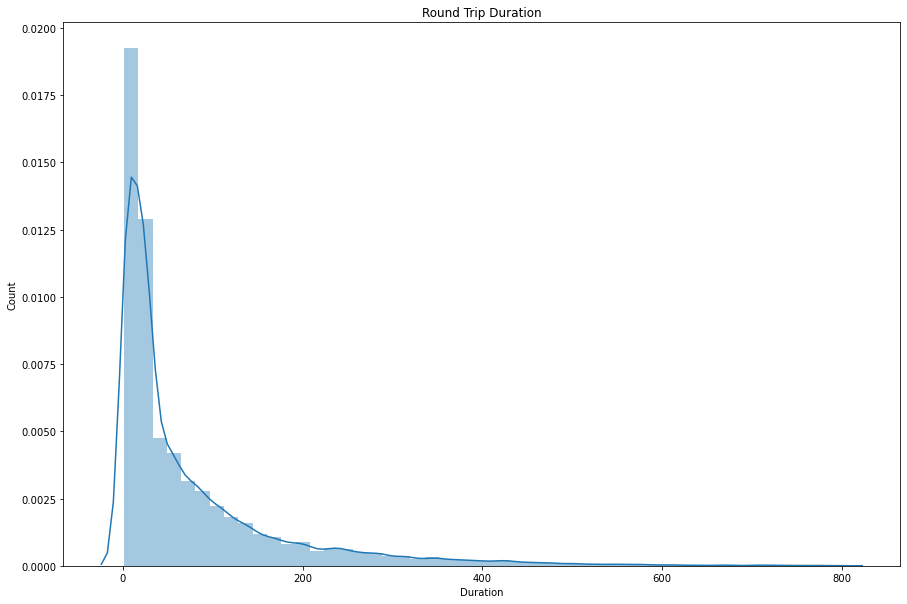

In [85]:
query_16v1 = query_16v1[query_16v1["time"] < 800]

fig, ax = pyplot.subplots(figsize=(15,10))

sns.distplot(query_16v1["time"], ax = ax).set_title("Round Trip Duration")
pyplot.xlabel("Duration")
pyplot.ylabel("Count")
pyplot.show()

We can see from the histogram that the majority of tourist trips are under 200 minutes, with possible outliers contributing to the major tail and positive right skew. 

In [86]:
%%bigquery query_16

WITH tempTable AS (
  SELECT (duration_sec/60) AS time, 
  FROM `bigquery-public-data.san_francisco.bikeshare_trips`
  WHERE start_station_id = end_station_id)
SELECT AVG(time) AS avg_RoundTrip
FROM tempTable;

In [87]:
query_16

,avg_RoundTrip
0,99.02484


More specifically, we can see that the average duration of a tourist ride is about 100 minutes.   

Therefore, tourist trips have their own unique characterists that can be leveraged in order to offer promotions that would encourage greater use of the bike-share service as a method for site-seeing.

As a result we can recommend two additional promotions that more specifically target tourists.  

* Round-Trip Bundles

As we have defined tourist rides to be round trips, just like with commuters, we can offer the ability to buy rides "in bulk". These bundles would guarantee riders a certain amount of trips, all at a discounted rate. This deal could potentially attract new riders that are looking for an afforable way to get to around the city.

For instance, we could offer a bundle of rides that allow for 5 round trip rides that take 1-2 hours. This would be especially attractive to families visiting the city that would like to choose their own path as they ride around and take in the landmarks. We could also offer larger bundles that would consist of more round trip rides that can be shared amongst a large group. 

This deal can then make the bike-share service a more feasible option for site-seeing and, thus, help to increase ridership amongst tourists.

* Duration-Based Promotions

As tourist trips take 100 minutes on average, we can offer tourists duration-based promotions. This would motivate riders that are discouraged by exponential fees to use the bike-share service and even encourage them to ride around longer.

An example promotion could be 25% off every 30 minutes after their first hour of a round trip. We can also offer a 24 hour pass if the rider plans to take even longer trips or multiple long trips throughout the day. The day pass would be a flat rate priced at the average 6 hour ride cost and even allow the rider to start and end rides where and when they please to allow for greater flexibility. Therefore, duration-based promotions can attract more riders to use the bike-share service and, consequesntly, increase profits.

Overall, these recommened promotions can help increase ridership for the bike-share service.